In [1]:
import numpy
import csv
import re
import pandas as pd
b = '../Data/'
path_value = b + r"data - eurusd.csv"

In [2]:
check = pd.read_csv(r"C:\Users\Андрей\Downloads\annotations.csv")

In [3]:
check

,article_text,manual_mark,gpt_mark,id,tool_name,key_sentence
0,"""4-hour timeframeTechnical details:Higher line...",1,1,4,EUR/USD,The EUR/USD currency pair moved upward and is ...
1,"""4-hour timeframeTechnical details:Higher line...",1,1,10,EUR/USD,The EUR/USD pair has started a new round of do...
2,"""4-hour timeframeTechnical details:Higher line...",1,1,15,EUR/USD,The EUR/USD pair has overcome the moving avera...
3,"""4-hour timeframeTechnical details:Higher line...",1,1,16,EUR/USD,The EUR/USD pair has overcome the moving avera...
4,"""4-hour timeframeTechnical details:Higher line...",-1,-1,19,EUR/USD,The EUR/USD pair resumed its downward movement...
...,...,...,...,...,...,...
1245,NZD/USD has recently bounced off the support a...,-2,1,1008,NZD/USD,The price is currently residing above the supp...
1246,USD/CHF has recently retested the 0.9450 price...,2,-1,1148,USD/CHF,The price is currently expected to proceed low...
1247,"Meanwhile, the Brexit delay did empower EUR l...",-2,0,786,EUR/JPY,EUR is anticipated to sustain the strong momen...
1248,NZD/USD has been quite bearish in nature but c...,2,-1,1011,NZD/USD,NZD has been recently heavily dominated by USD...


In [4]:
# import json 
# columns_to_parse = ['tools','gpt_decision']
# for column in columns_to_parse:
#     check[column] = check[column].apply(lambda x: f'{x[1:-1]}'.split(','))
# check = check[(check['tools'].apply(len) == 1) & (check['uid'].apply(lambda x: x.isdigit()))]
# new_data = check[columns_to_parse + ['article_text']]
# # new_data = pd.DataFrame({'tools': new_tools, 'decision': new_decision, 'new_sentences': new_sentences})
# best_tools = ['EUR/USD', 'GBP/USD', 'USD/JPY']

In [5]:
new_d, new_sentences = [], []
for row in check.iterrows():
    manual = row[1]['manual_mark']
    gpt = row[1]['gpt_mark']
    sentences = row[1]['article_text']
    new_d.append(manual)
    new_sentences.append(sentences)
    new_d.append(gpt)
    new_sentences.append(sentences)

In [6]:
import numpy as np 
new_data = pd.DataFrame({'task':new_sentences, 'label': new_d, 'worker':[1 if i % 2 == 0 else 0 for i in range(len(new_d))]})

In [7]:
!pip install crowd-kit

Defaulting to user installation because normal site-packages is not writeable


In [8]:
new_data = new_data.reset_index()

In [9]:
from crowdkit.aggregation.classification.dawid_skene import DawidSkene
ds = DawidSkene()
predict = ds.fit_predict(new_data)
new_data = new_data.set_index('task')
new_data['ds_predict'] = predict

In [10]:
new_data = new_data.reset_index()

In [11]:
ds.errors_.sort_index().round(3)

-2     -1      0      1      2
worker label                                   
0      -2     0.192  0.010  0.000  0.000  0.014
       -1     0.431  0.944  0.000  0.003  0.088
        0     0.155  0.017  0.996  0.134  0.135
        1     0.222  0.028  0.004  0.863  0.757
        2     0.000  0.000  0.000  0.000  0.006
1      -2     0.969  0.701  0.538  0.129  0.000
       -1     0.021  0.164  0.049  0.028  0.000
        1     0.000  0.008  0.000  0.449  0.000
        2     0.009  0.127  0.413  0.394  1.000

In [12]:
import warnings
warnings.filterwarnings("default")

In [13]:
a = pd.ExcelFile(b + "currencies_fixed_4.xlsx")
tables = []
for sheet in a.sheet_names:
    tables.append(pd.read_excel(b + "currencies_fixed_4.xlsx", sheet))

In [14]:
result_table = pd.concat(tables)

In [15]:
target_column = best_tools[0]
result_table = result_table[result_table['Currency'] == target_column]

NameError: name 'best_tools' is not defined

In [ ]:
text = 'Text EN'

In [ ]:
d = result_table[(result_table[text] != '-') & (result_table['Recommendations EN\n'] != '-\n')]

In [ ]:
x = d[[text, 'Recommendations EN\n']]
x

In [ ]:
patterns = {'buy orders should be': -1,
                'sell orders should be': 1,
                'it is recommended to buy': -2,
                'it is recommended to sell': 2,
               'it is recommended to consider buying': -2,
                'it is recommended to consider selling': 2,
                'you can return to sell': 1,
                'you can return to buy': -1,
                'it is recommended to return to buying': -2,
                'it is recommended to return to selling': 2,
                'it is recommended to open new sell orders': 2,
                'it is recommended to open new buy orders': -2,
                'it is recommended to consider sell orders': 2,
                'it is recommended to consider buy orders': -2,
                'It is recommended to consider short positions': 2,
                'It is recommended to consider long positions': -2,
                'Buy orders are recommended': -2,
                'Sell orders are recommended': 2,
                'It is also recommended to consider buying': -2,
                'It is also recommended to consider selling': 2,
                'purchases of the pair will be': -1,
                'sales of the pair will be': 1,
                'Sales of the pair are possible now': 1,
                "purchases of the pair are possible now": -1,
                'The sale of the pair will be possible': 1,
                "It is recommended to open buy orders": -2,
                "It is recommended to open sell orders": 2,
                "it is now recommended to open buy orders": -2,
                "it is now recommended to open sell orders": 2,
                "It is recommended to re-consider options for opening long positions": -1,
                "It is recommended to re-consider options for opening short positions": 1,
                "You will not be able to buy": -1,
                "You will not be able to sell": 1,
                "You can sell the pair": 1,
                "You can buy the pair": -1,
                "You can purchase the pair": -1,
                "It will be possible to return to sell positions": 1,
                "It will be possible to return to buy positions": -1,
                "Short positions can be considered": 1,
                "Long positions can be considered": -1
               }
report_texts_patterns = [
    (-2, 'it is recommended to return to selling'), 
    (2, 'it is recommended to open new buy orders'), 
    (-1, 'you can return to sell'), 
    (1, 'purchases of the pair will be')
]
def label_data(x, column, patterns):   
    cnt = 0
    labels = [0] * len(x)
    for i, text in enumerate(x[column]):
        for pattern in patterns:
            if pattern.lower() in '. '.join(text.lower().split('. ')[-5:][::-1]):
                pop_idx = None
                for i, (l, p) in enumerate(report_texts_patterns):
                    if p in '. '.join(text.lower().split('. ')[-5:][::-1]):
                        print(f'Пример размеченного текста с меткой {l} -- {". ".join(text.lower().split(". ")[-5:][::-1])}')
                        pop_idx = i
                        break 
                if pop_idx is not None:
                    report_texts_patterns.pop(pop_idx)
                cnt += 1
                labels[i] = patterns[pattern]
                break
    print(f'Found {cnt} texts to label')
    y = x.copy()
    y['labels'] = labels
    return y 

In [ ]:
y = label_data(x, 'Recommendations EN\n', patterns)

In [ ]:
new_data['labels'] = new_data['labels'].apply(lambda x: x[0])

In [ ]:
new_data

In [ ]:
label_data(new_data, text, new_patterns)

In [ ]:
new_patterns = {
    'Bullish Divergence': 2,
    'Bearish Divergence': -2,
    'Bullish Continuous Divergence': 2,
    'Bearish Continuous Divergence': -2,
    'Bearish Hidden Divergence': -2,
    'Bullish Hidden Divergence': 2,
    'bearish pressure': -2,
    'bullish pressure': 2,
    'bearish momentum': -2,
    'bullish momentum': 2,
    'bullish bias': 2,
    'bearish bias': -2,
    'bearish move': -2,
    'bullish move': 2,
    'buying with': 2,
    'selling with': -2
}

In [ ]:
unparsed_texts = result_table[(result_table[text] != '-') & (result_table['Recommendations EN\n'] == '-\n')]

In [ ]:
technical_view_texts = unparsed_texts[unparsed_texts[text].apply(lambda x: 'technical view' in x)]
y1 = label_data(technical_view_texts, text, new_patterns)

In [ ]:
text = 'Text EN'
target = 'labels'
labeled_data = pd.concat([y, y1])[[text, target]]

In [ ]:
labeled_data[labeled_data['labels'] != 0].to_csv("label_data.csv", index=False, header=True)

In [ ]:
new_data[new_data['tools'].apply(lambda x: x == [target_column])]

In [ ]:
new_data = new_data[new_data['tools'].apply(lambda x: x == [target_column])][['gpt_decision', 'article_text']]
new_data.rename({'gpt_decision': 'labels', 'article_text': text}, axis=1, inplace=True)

In [ ]:
labeled_data = pd.concat([labeled_data, new_data])

In [44]:
# new_data = new_data[['task', 'ds_predict']].rename({'task': text, 'ds_predict':'labels'}, axis=1)

In [16]:
labeled_data = pd.read_csv('final_data_for_diploma')

In [18]:
labeled_data.drop('Unnamed: 0', axis=1, inplace=True)

In [22]:
text = 'Text EN'

In [23]:
# labeled_data = new_data

In [24]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
transformation_dictionary = {}
snowball = SnowballStemmer(language="english")
def apply_tokenizing(t):
    text = re.sub('[^A-Za-z ]', " ", t).lower()
    tokenized = word_tokenize(text, language="english")
    stops = stopwords.words("english")
    filtered_tokens = []
    for token in tokenized:
        if token not in stops:
            filtered_tokens += [token]
    return " ".join(filtered_tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Андрей\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Андрей\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
labeled_data[text] = labeled_data[text].apply(apply_tokenizing)
final_data = labeled_data

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [27]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

In [28]:
final_data['labels'] = final_data['labels'].apply(lambda x: x[0] if type(x) == list else x )

In [29]:
final_data = final_data.drop_duplicates()
final_data_without_na = final_data

In [30]:
final_data_without_na.shape

(6292, 2)

In [31]:
labels_mapper = {
    -2: 0,
    -1: 1,
    0: 2,
    1: 3,
    2: 4
}

def map_labels(x):
    return labels_mapper[int(x)]

In [32]:
final_data_without_na['labels'] = final_data_without_na['labels'].apply(map_labels)
final_data_without_na['labels'].value_counts()

C:\Users\Андрей\AppData\Local\Temp\ipykernel_11152\467938242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data_without_na['labels'] = final_data_without_na['labels'].apply(map_labels)


labels
2    1696
1    1694
3    1191
4     930
0     781
Name: count, dtype: int64

In [33]:
target = 'labels'
X, y = final_data_without_na[text], final_data_without_na[target]

In [36]:
from sklearn.model_selection import train_test_split
X, y = final_data_without_na[text], final_data_without_na[target]
x_train, x_valid, y_train, y_valid = train_test_split(X, y, train_size=0.85, random_state=1)

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv_bigram, cv_word = CountVectorizer(ngram_range=(2,3)), CountVectorizer(ngram_range=(1,2))
tfid_bigram, tfid_word = TfidfVectorizer(ngram_range=(2, 3)), TfidfVectorizer(ngram_range=(1, 2))

X, X1, X_cv_bigram, X_cv_word = tfid_bigram.fit_transform(x_train), tfid_word.fit_transform(x_train), cv_bigram.fit_transform(x_train), cv_word.fit_transform(x_train)
X_test, X_test1, X_test_cv_bigram, X_test_cv_word = tfid_bigram.transform(x_valid), tfid_word.transform(x_valid), cv_bigram.transform(x_valid), cv_word.transform(x_valid)

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import accuracy_score
pipe = Pipeline([('TfidfVectorizer', TfidfVectorizer(ngram_range=(2, 2))), \
                ('SGD', SGDClassifier(n_jobs=-1))])
pipe1 = Pipeline([('TfidfVectorizer', TfidfVectorizer(ngram_range=(1,1))), \
                ('SGD', SGDClassifier(n_jobs=-1))])
pipe2 = Pipeline([('CountVectorizer', CountVectorizer(ngram_range=(1,1))), \
                ('SGD', SGDClassifier(n_jobs=-1))])
pipe3 = Pipeline([('CountVectorizer', CountVectorizer(ngram_range=(2,2))), \
                ('SGD', SGDClassifier(n_jobs=-1))])
param_grid = {

        'SGD__alpha': np.logspace(-3, 2, num=5)
}

crs = GridSearchCV(pipe,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(accuracy_score))
crs1 = GridSearchCV(pipe1,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(accuracy_score))
crs2 = GridSearchCV(pipe2,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(accuracy_score))
crs3 = GridSearchCV(pipe3,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(accuracy_score))
crs.fit(final_data_without_na[text], final_data_without_na[target])
crs1.fit(final_data_without_na[text], final_data_without_na[target])
crs2.fit(final_data_without_na[text], final_data_without_na[target])
crs3.fit(final_data_without_na[text], final_data_without_na[target])

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('CountVectorizer',
                                        CountVectorizer(ngram_range=(2, 2))),
                                       ('SGD', SGDClassifier(n_jobs=-1))]),
             param_grid={'SGD__alpha': array([1.00000000e-03, 1.77827941e-02, 3.16227766e-01, 5.62341325e+00,
       1.00000000e+02])},
             scoring=make_scorer(accuracy_score))

In [40]:
crs.best_score_, crs.best_params_, crs1.best_score_, crs1.best_params_,crs.best_score_, crs2.best_params_,crs3.best_score_, crs3.best_params_

(0.47822631913541,
 {'SGD__alpha': 0.01778279410038923},
 0.4779084551811824,
 {'SGD__alpha': 0.001},
 0.47822631913541,
 {'SGD__alpha': 0.31622776601683794},
 0.5185950413223142,
 {'SGD__alpha': 0.01778279410038923})

In [41]:
from sklearn.model_selection import cross_val_score
cross_val_score(SGDClassifier(alpha=0.001, n_jobs=1, random_state=12), X_test_cv_bigram, y_valid, cv=5)

array([0.46031746, 0.47619048, 0.48148148, 0.3968254 , 0.43085106])

# SGD

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
best = SGDClassifier(alpha = crs.best_params_['SGD__alpha'])
best1 = SGDClassifier(alpha = crs1.best_params_['SGD__alpha'], random_state=12)
best2 = SGDClassifier(alpha = crs2.best_params_['SGD__alpha'], random_state=12)
best3 = SGDClassifier(alpha = crs3.best_params_['SGD__alpha'], random_state=12)
best.fit(X, y_train), best1.fit(X1, y_train), best2.fit(X_cv_bigram, y_train), best3.fit(X_cv_word, y_train)
print(f'TF-IDF bigram {accuracy_score(best.predict(X_test), y_valid)}')
print(f'TF-IDF word {accuracy_score(best1.predict(X_test1), y_valid)}')
print(f'CountVectorizer bigram {accuracy_score(best2.predict(X_test_cv_bigram), y_valid)}')
print(f'CountVectorizer word {accuracy_score(best3.predict(X_test_cv_word), y_valid)}')

TF-IDF bigram 0.4544491525423729
TF-IDF word 0.4639830508474576
CountVectorizer bigram 0.4608050847457627
CountVectorizer word 0.5127118644067796


# SVC

In [ ]:
from sklearn.svm import LinearSVC
text = 'Text EN'
target = 'labels'
pipe = Pipeline([('TfidfVectorizer', TfidfVectorizer(ngram_range=(2, 2))), \
                ('SGD', LinearSVC())])
pipe1 = Pipeline([('TfidfVectorizer', TfidfVectorizer(ngram_range=(1,1))), \
                ('SGD', LinearSVC())])
pipe2 = Pipeline([('CountVectorizer', CountVectorizer(ngram_range=(1,1))), \
                ('SGD', LinearSVC())])
pipe3 = Pipeline([('CountVectorizer', CountVectorizer(ngram_range=(2,2))), \
                ('SGD', LinearSVC())])
param_grid = {

        'SGD__C': [ 10 ** i for i in range(-5, 3) ]
}
crs = GridSearchCV(pipe,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(accuracy_score))
crs1 = GridSearchCV(pipe1,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(accuracy_score))
crs2 = GridSearchCV(pipe2,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(accuracy_score))
crs3 = GridSearchCV(pipe3,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True),scoring=make_scorer(accuracy_score))
crs.fit(final_data_without_na[text], final_data_without_na[target])
crs1.fit(final_data_without_na[text], final_data_without_na[target])
crs2.fit(final_data_without_na[text], final_data_without_na[target])
crs3.fit(final_data_without_na[text], final_data_without_na[target])

In [45]:
crs.best_score_, crs.best_params_, crs1.best_score_, crs1.best_params_,crs.best_score_, crs2.best_params_,crs3.best_score_, crs3.best_params_

(0.5224094087730452,
 {'SGD__C': 1},
 0.5074698029243484,
 {'SGD__C': 1},
 0.5224094087730452,
 {'SGD__C': 0.001},
 0.5251112523839797,
 {'SGD__C': 0.01})

In [46]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=crs.best_params_['SGD__C'])
svc1 = LinearSVC(C=crs.best_params_['SGD__C'])
svc2 = LinearSVC(C=crs.best_params_['SGD__C'], random_state=12)
svc3 = LinearSVC(C=crs.best_params_['SGD__C'], random_state=12)
svc.fit(X, y_train), svc1.fit(X1, y_train), svc2.fit(X_cv_bigram, y_train), svc3.fit(X_cv_word, y_train)
print(f'TF-IDF bigram {accuracy_score(svc.predict(X_test), y_valid)}')
print(f'TF-IDF word {accuracy_score(svc1.predict(X_test1), y_valid)}')
print(f'CountVectorizer bigram {accuracy_score(svc2.predict(X_test_cv_bigram), y_valid)}')
print(f'CountVectorizer word {accuracy_score(svc3.predict(X_test_cv_word), y_valid)}')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will chan

TF-IDF bigram 0.4989406779661017
TF-IDF word 0.510593220338983
CountVectorizer bigram 0.4968220338983051
CountVectorizer word 0.4798728813559322


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [47]:
print(f'TF-IDF bigram {accuracy_score(svc.predict(X_test), y_valid)}')
print(f'TF-IDF word {accuracy_score(svc1.predict(X_test1), y_valid)}')
print(f'CountVectorizer bigram {accuracy_score(svc2.predict(X_test_cv_bigram), y_valid)}')
print(f'CountVectorizer word {accuracy_score(svc3.predict(X_test_cv_word), y_valid)}')

TF-IDF bigram 0.4989406779661017
TF-IDF word 0.510593220338983
CountVectorizer bigram 0.4968220338983051
CountVectorizer word 0.4798728813559322


# CATBOOST

In [ ]:
from catboost import CatBoostClassifier

cat2 = CatBoostClassifier()
cat2.fit(X_cv_bigram, y_train)

In [49]:
print(f'CountVectorizer bigram {accuracy_score(cat2.predict(X_test_cv_bigram), y_valid)}')

CountVectorizer bigram 0.5116525423728814


In [53]:
def count_accuracy(x, y):
    def accuracy(x, y):
        if (x in [0, 1] and y in [0, 1]) or (x in [3, 4] and y in [3, 4]) or (x == 2 and y == 2): 
            return 1
        return 0 
    acc = []
    for f, g in zip(x, y):
        acc.append(accuracy(f, g))
    return sum(acc) / len(acc)

In [58]:
print(f'SVC TF-IDF word {count_accuracy(svc1.predict(X_test1), y_valid)}')
print(f'SGD CountVectorizer word {count_accuracy(best3.predict(X_test_cv_word), y_valid)}')
print(f'CatBoost CountVectorizer bigram {count_accuracy(cat2.predict(X_test_cv_bigram), y_valid)}')
print(f'Random forest CountVectorizer word {count_accuracy(rf3.predict(X_test_cv_word), y_valid)}')

SVC TF-IDF word 0.5942796610169492
SGD CountVectorizer word 0.6038135593220338
CatBoost CountVectorizer bigram 0.5847457627118644
Random forest CountVectorizer word 0.5307203389830508


# RANDOM FOREST

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(500)
rf1 = RandomForestClassifier(500)
rf2 = RandomForestClassifier(500)
rf3 = RandomForestClassifier(500)
rf.fit(X, y_train), rf1.fit(X1, y_train), rf2.fit(X_cv_bigram, y_train), rf3.fit(X_cv_word, y_train)

(RandomForestClassifier(n_estimators=500),
 RandomForestClassifier(n_estimators=500),
 RandomForestClassifier(n_estimators=500),
 RandomForestClassifier(n_estimators=500))

In [56]:
print(f'TF-IDF bigram {accuracy_score(rf.predict(X_test), y_valid)}')
print(f'TF-IDF word {accuracy_score(rf1.predict(X_test1), y_valid)}')
print(f'CountVectorizer bigram {accuracy_score(rf2.predict(X_test_cv_bigram), y_valid)}')
print(f'CountVectorizer word {accuracy_score(rf3.predict(X_test_cv_word), y_valid)}')

TF-IDF bigram 0.4777542372881356
TF-IDF word 0.4639830508474576
CountVectorizer bigram 0.4533898305084746
CountVectorizer word 0.4661016949152542


# Оценка качества работы моделей

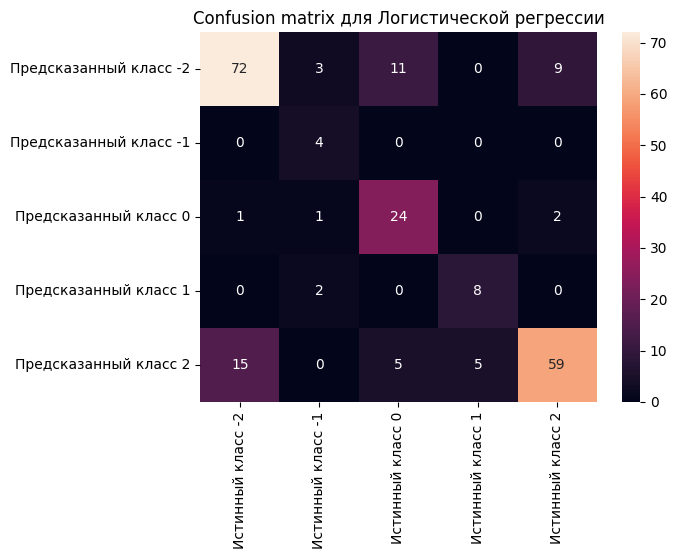

In [173]:
best_models = [(best2, 'Логистической регрессии'), (svc2, 'Метода опорных векторов'), (cat2, 'Градиентного бустинга'), (rf2, 'Случайного леса')]
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
grades = [-2, -1, 0, 1, 2]
def estimate(best2, name):
    plt.title(f'Confusion matrix для {name}')
    sns.heatmap(pd.DataFrame(confusion_matrix(best2.predict(X_test_cv_bigram), y_valid.astype(np.int64)),\
                            columns=['Истинный класс ' + str(grade) for grade in grades], index=['Предсказанный класс ' + str(grade) for grade in grades]), annot=True, fmt='')
estimate(*best_models[0])

In [177]:
model.eval()
all_predictions = []
all_labels = []
for batch in tqdm(test_dataloader, leave=False):
    preprocess_batch(batch)
    with torch.no_grad():
        outputs = model(**batch)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    true_labels = batch['labels']
    all_predictions.append(predictions)
    all_labels.append(true_labels)

  0%|          | 0/28 [00:00<?, ?it/s]

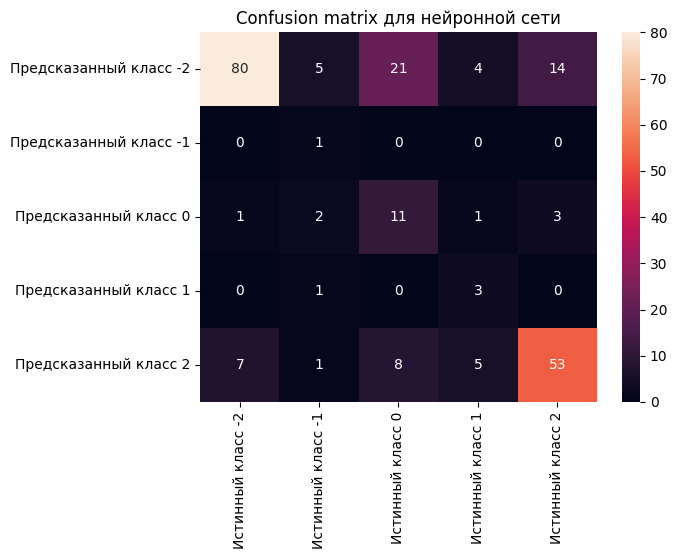

In [178]:
plt.title(f'Confusion matrix для нейронной сети')
sns.heatmap(pd.DataFrame(confusion_matrix(torch.cat(all_predictions).cpu(), torch.cat(all_labels).cpu()),\
                        columns=['Истинный класс ' + str(grade) for grade in grades], index=['Предсказанный класс ' + str(grade) for grade in grades]), annot=True, fmt='');

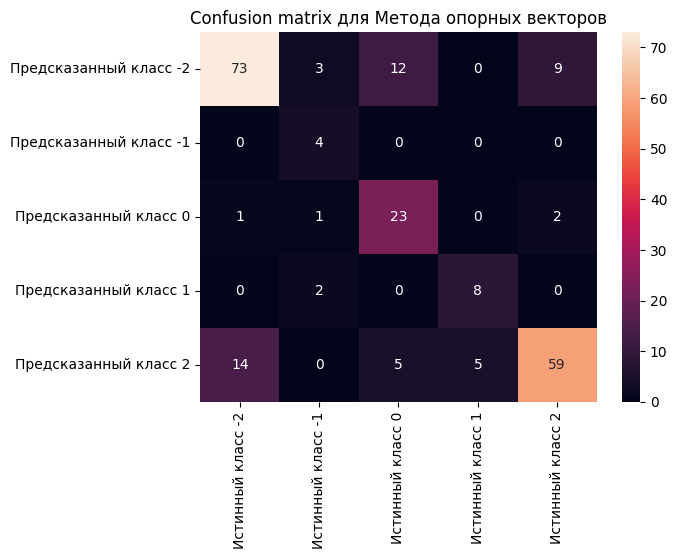

In [179]:
estimate(*best_models[1])

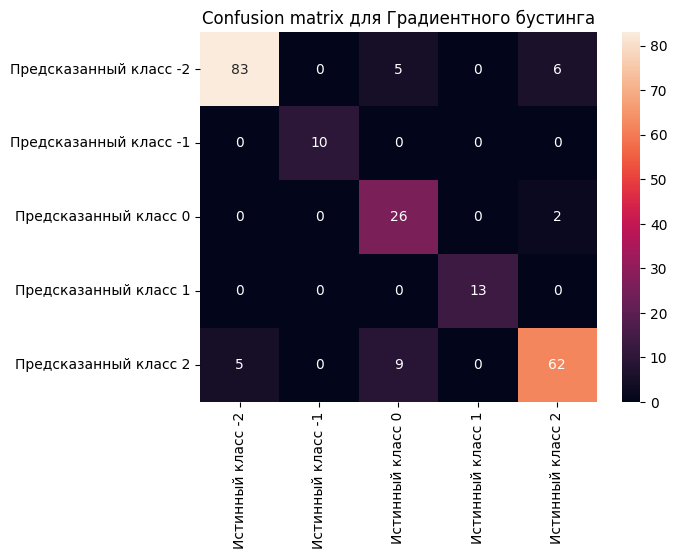

In [180]:
estimate(*best_models[2])

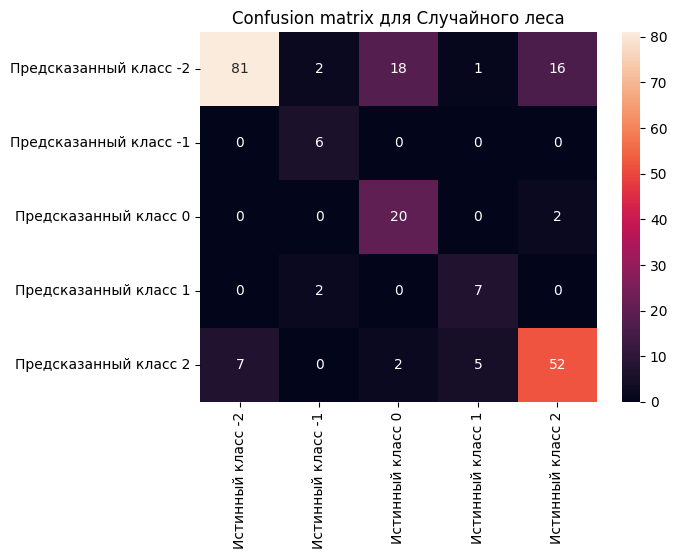

In [181]:
estimate(*best_models[3])

In [81]:
labeled_data[labeled_data['labels'] == 0].iloc[][0]

'hour timeframe technical details higher linear regression channel direction downward lower linear regression channel direction downward moving average smoothed downward cci new trading week begins continuing downward movement traders continue wonder markets fully return normal begin respond macroeconomic statistics however happening currency market still good option volatility principle remains high euro dollar pair mainly moves one direction without changing every day thus increased volatility trading could even called quite comfortable although example friday despite huge package macroeconomic information market participants showed lowest volatility last trading days still believe correction correction option likely downward movement continues likely local lows march updated believe reasons growth us currency given fact united states leading number people infected coronavirus donald trump predicts deaths epidemic europe situation better conditions alliance states almost unclear us d

In [182]:
from sklearn.metrics import classification_report
def summarize(algo, name):
    print(f'Classification report для {name}')
    print(classification_report(algo.predict(X_test_cv_bigram), y_valid))

In [183]:
print(f'Classification report для нейронной сети')
print(classification_report(torch.cat(all_predictions).cpu(), torch.cat(all_labels).cpu()))

Classification report для нейронной сети
              precision    recall  f1-score   support

           0       0.91      0.65      0.75       124
           1       0.10      1.00      0.18         1
           2       0.28      0.61      0.38        18
           3       0.23      0.75      0.35         4
           4       0.76      0.72      0.74        74

    accuracy                           0.67       221
   macro avg       0.45      0.74      0.48       221
weighted avg       0.79      0.67      0.71       221



In [184]:
summarize(*best_models[0])

Classification report для Логистической регрессии
              precision    recall  f1-score   support

           0       0.82      0.76      0.79        95
           1       0.40      1.00      0.57         4
           2       0.60      0.86      0.71        28
           3       0.62      0.80      0.70        10
           4       0.84      0.70      0.77        84

    accuracy                           0.76       221
   macro avg       0.66      0.82      0.71       221
weighted avg       0.78      0.76      0.76       221



In [185]:
summarize(*best_models[1])

Classification report для Метода опорных векторов
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        97
           1       0.40      1.00      0.57         4
           2       0.57      0.85      0.69        27
           3       0.62      0.80      0.70        10
           4       0.84      0.71      0.77        83

    accuracy                           0.76       221
   macro avg       0.65      0.82      0.70       221
weighted avg       0.79      0.76      0.76       221



In [186]:
summarize(*best_models[2])

Classification report для Градиентного бустинга
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        94
           1       1.00      1.00      1.00        10
           2       0.65      0.93      0.76        28
           3       1.00      1.00      1.00        13
           4       0.89      0.82      0.85        76

    accuracy                           0.88       221
   macro avg       0.90      0.93      0.91       221
weighted avg       0.89      0.88      0.88       221



In [187]:
summarize(*best_models[3])

Classification report для Случайного леса
              precision    recall  f1-score   support

           0       0.92      0.69      0.79       118
           1       0.60      1.00      0.75         6
           2       0.50      0.91      0.65        22
           3       0.54      0.78      0.64         9
           4       0.74      0.79      0.76        66

    accuracy                           0.75       221
   macro avg       0.66      0.83      0.72       221
weighted avg       0.80      0.75      0.76       221



In [66]:
import matplotlib.pyplot as plt
import numpy as np
def visualize_coefficients(classifier, feature_names, name, n_top_features=50, is_cb=False):
    coef = classifier.coef_.ravel() if not is_cb else classifier.get_feature_importance()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features] 
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    figure, axis = plt.subplots(1, 2, figsize=(20,15)) if not is_cb else plt.subplots(figsize=(20,15))
    axis[0].bar(np.arange(n_top_features), coef[positive_coefficients])
    axis[0].set_title(f"Топ {n_top_features} положительных слов в словаре эмоциональной окраски для {name}")
    if not is_cb:
        axis[1].bar(np.arange(n_top_features), abs(coef[negative_coefficients]))
        axis[1].set_title(f"Топ {n_top_features} негативных слов в словаре эмоциональной окраски для {name}")
    #axis[1].set_title(f"Топ 25 слов в словаре эмоциональной окраски для {name}")
    #plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    positive_coefficients %= len(feature_names)
    negative_coefficients %= len(feature_names)
    feature_names = np.array(feature_names)
    axis[0].set_xticks(
        np.arange(1, 1 + n_top_features),
        feature_names[positive_coefficients],
        rotation=60,
        ha="right",
    );
    if not is_cb:
        axis[1].set_xticks(
            np.arange(1, 1 + n_top_features),
            feature_names[negative_coefficients],
            rotation=60,
            ha="right",
        );
    plt.show();

In [67]:
def visualize_catboost_coefficients(classifier, feature_names, name, n_top_features=50):
    coef = classifier.get_feature_importance()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    interesting_coefficients = positive_coefficients
    plt.figure(figsize=(15, 5))
    plt.bar(np.arange(n_top_features), coef[positive_coefficients])
    plt.title(f"Топ {n_top_features} важных {name} в словаре эмоциональной окраски")
    feature_names = np.array(feature_names)
    plt.xticks(
        np.arange(1, 1 + n_top_features),
        feature_names[positive_coefficients],
        rotation=60,
        ha="right",
    );

In [40]:
import numpy as np 
coef = cat2.get_feature_importance()
positive_coefficients = np.argsort(coef)[-100:]
for i in cv_bigram.get_feature_names_out()[positive_coefficients][::-1]:
    print(i)

bearish pressure
look technical
expect movement
let us look
bullish bias
technical view
bearish bias
bullish pressure
look technical view
expect movement within
bullish divergence
recommended buy
buy orders opened
euro dollar currency
trading recommendations eur
economic reports
bearish divergence
recommendations eur
orders opened
sell orders opened
bearish momentum
bias expected
towards support area
recommended sell
value average
resistance levels trading
resistance levels
recommended trade pair
thus sales
per day pound
channel direction
points per day
bullish bias expected
keep open heiken
trade pair
pair value average
previous figure
bullish momentum
currently points
orders targets price
bearish bias expected
average targets
price remains
positions considered
thus expect movement
recommended consider
targets heiken
support area coming
nearest support
technical view price
timeframe thus today
eur usd
euro dollar
recommendations eur usd
turns sell orders
consider sell
consider sell or

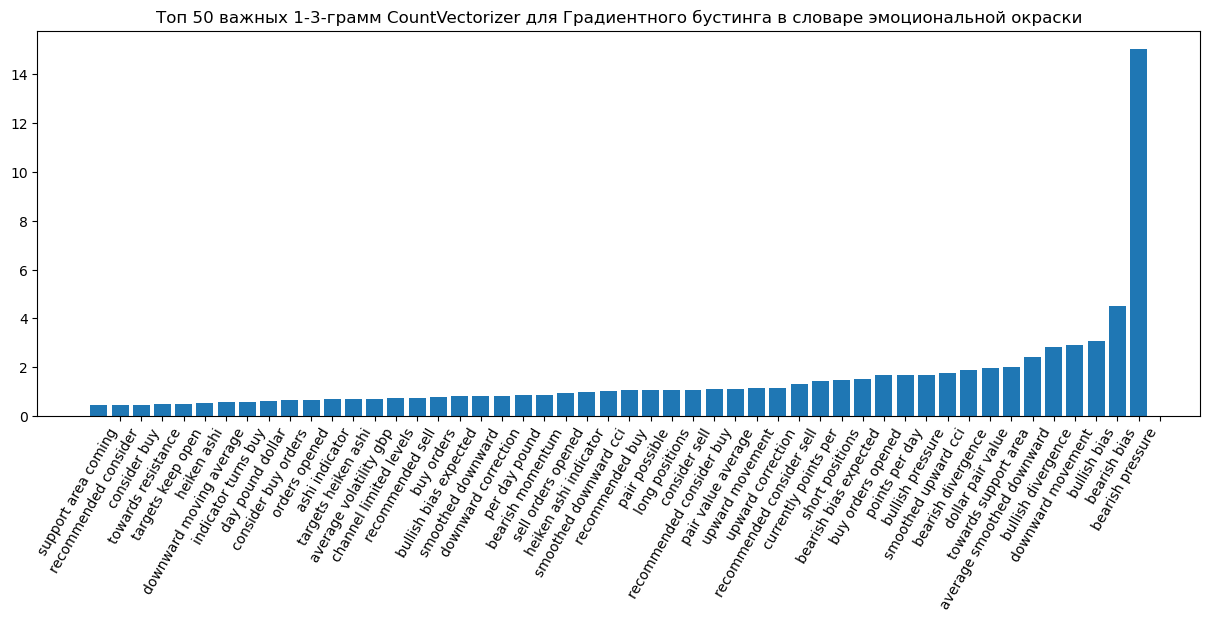

In [68]:
visualize_catboost_coefficients(cat2, cv_bigram.get_feature_names_out(), '1-3-грамм CountVectorizer для Градиентного бустинга')

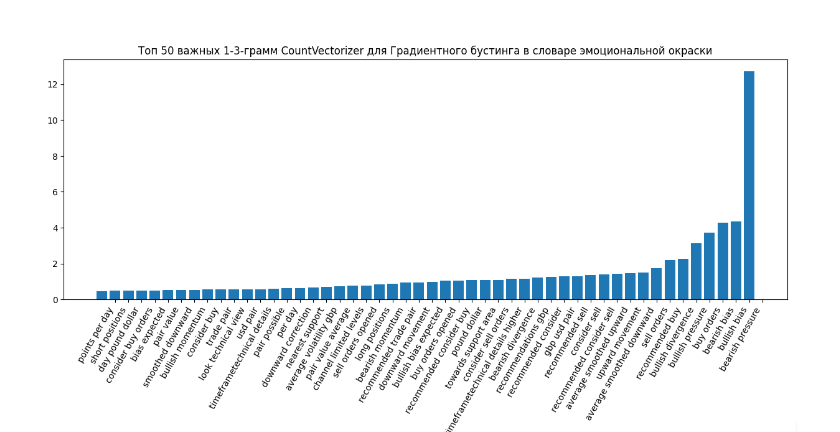

In [79]:
class Transformer:
    def transform(self,data):
        return [apply_tokenizing(x) for x in data]

In [80]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('preprocessing', Transformer()),
    ('vectorizing', cv_bigram),
    ('model', cat2)
])

In [104]:
import joblib
joblib.dump(pipe, 'pipeline.pkl', compress = 1)

['pipeline.pkl']

In [116]:
output_json = {}
output_json['tool'] = None
output_json['sentence'] = None
output_json['decision'] = 4
json.dumps(output_json)

'{"tool": null, "sentence": null, "decision": 4}'

In [110]:
s = """{
    "uid": "361394",
    "url": "https://www.instaforex.com/forex_analysis/361394",
    "title": "\nАмериканский премаркет на 24 ноября: фондовый рынок США готовится продолжить рост ",
    "text": "Фьючерсы на американские фондовые индексы открылись ростом после выходного дня. Оптимизм относительно того, что ключевые центральные банки все же займут более мягкую позицию в отношении процентных ставок, продолжает подпитывать рынки. Фьючерсы на S&P 500 выросли на 0,2%, тогда как высокотехнологический NASDAQ и поднялся на 0,3%. Промышленный Dow Jones торгуется практически без изменений. Европейские индексы выросли после того, как президент Европейского центрального банка Кристин Лагард заявила, что политики могут взять паузу после цикла ужесточения ставок, который рискует погрузить еврозону в рецессию.«ЕЦБ сейчас находится на той стадии, когда он может взять паузу, чтобы оценить последствия ужесточения политики», – сказала Лагард, вторя другим политикам, которые предположили в пятницу, что дальнейшее ужесточение может и не понадобиться. Улучшение деловой уверенности в Германии стало еще одним лучом света на мрачном экономическом фоне региона.Тем временем член Управляющего совета ЕЦБ Роберт Хольцманн заявил, что существует равная вероятность повышения или снижения ставок во втором квартале 2024 года, в то время как его коллега Франсуа Виллерой де Гальо отметил, что Центральный банк не будет больше увеличивать стоимость заимствований, если только не произойдет непредвиденное событие.На этом фоне индекс Stoxx Europe 600 вырос примерно на 0,2%, показав лучший месяц с января этого года. Однако, как свидетельствовали вчерашние данные, хоть экономическая динамика еврозоны больше не ухудшается, показав первые признаки стабилизации, четвертый квартал может оказаться довольно неоднозначным.Казначейские облигации США снизились, сократив прибыль по ним. Доходность 10-летних облигаций выросла более чем на шесть базисных пунктов, следуя за снижением европейских облигаций после сообщения в четверг о том, что Германия может увеличить стоимость заимствований.Тем временем мировые фондовые индексы находятся на пути к лучшему месяцу за три года: индекс MSCI All Country World в этом месяце вырос на 8,6% на фоне растущих надежд на завершение цикла высоких процентных ставок в США. Как я отмечал выше, индикатор условий деловой среды, оценки текущей ситуации и экономических ожиданий по Германии в ноябре этого года выросли третий месяц подряд, указывая на предстоящее восстановление экономики, которая, вероятно, находится в рецессии и страдает от бюджетного кризиса. Азиатские индексы показали смешанную динамику. Акции Гонконга и материкового Китая упали, обратив вспять ралли четверга, вызванное расширяющейся кампанией Пекина по спасению рынка недвижимости. Нефть продолжила снижение после того, как альянс ОПЕК+ был вынужден отложить важную встречу из-за спора по поводу квот на добычу.Что касается технической картины S&P500, то спрос на индекс сохраняется. Сейчас быкам нужно защищать $4557 и забирать под контроль $4582. Это поможет укрепить восходящий тренд, а также откроет возможность к рывку на новый уровень $4609. Не менее приоритетной задачей быков будет и контроль над $4637, что укрепит позиции покупателей. В случае движения вниз на фоне снижения спроса аппетита к риску покупатели просто обязаны заявить о себе в районе $4557. Пробой быстро столкнет торговый инструмент назад на $4539 и откроет дорогу к $4515.",
    "creation_time": 1700836080000,
    "parsed_time": 1700880428353,
    "entities_ids": [
        103
    ],
    "entities": [],
    "predictions": [],
    "author_id": 410,
    "author": {
        "id": -1,
        "name": "",
        "surname": "",
        "url": ""
    },
    "paragraphs": [],
    "page": null
}
"""
import json 
x = json.loads(s, strict=False)

In [113]:
x['text']

'Фьючерсы на американские фондовые индексы открылись ростом после выходного дня. Оптимизм относительно того, что ключевые центральные банки все же займут более мягкую позицию в отношении процентных ставок, продолжает подпитывать рынки. Фьючерсы на S&P 500 выросли на 0,2%, тогда как высокотехнологический NASDAQ и поднялся на 0,3%. Промышленный Dow Jones торгуется практически без изменений. Европейские индексы выросли после того, как президент Европейского центрального банка Кристин Лагард заявила, что политики могут взять паузу после цикла ужесточения ставок, который рискует погрузить еврозону в рецессию.«ЕЦБ сейчас находится на той стадии, когда он может взять паузу, чтобы оценить последствия ужесточения политики», – сказала Лагард, вторя другим политикам, которые предположили в пятницу, что дальнейшее ужесточение может и не понадобиться. Улучшение деловой уверенности в Германии стало еще одним лучом света на мрачном экономическом фоне региона.Тем временем член Управляющего совета ЕЦБ 

In [106]:
joblib.load('pipeline.pkl').predict(['hi bro'])[0][0]

4

<Figure size 1500x500 with 0 Axes>

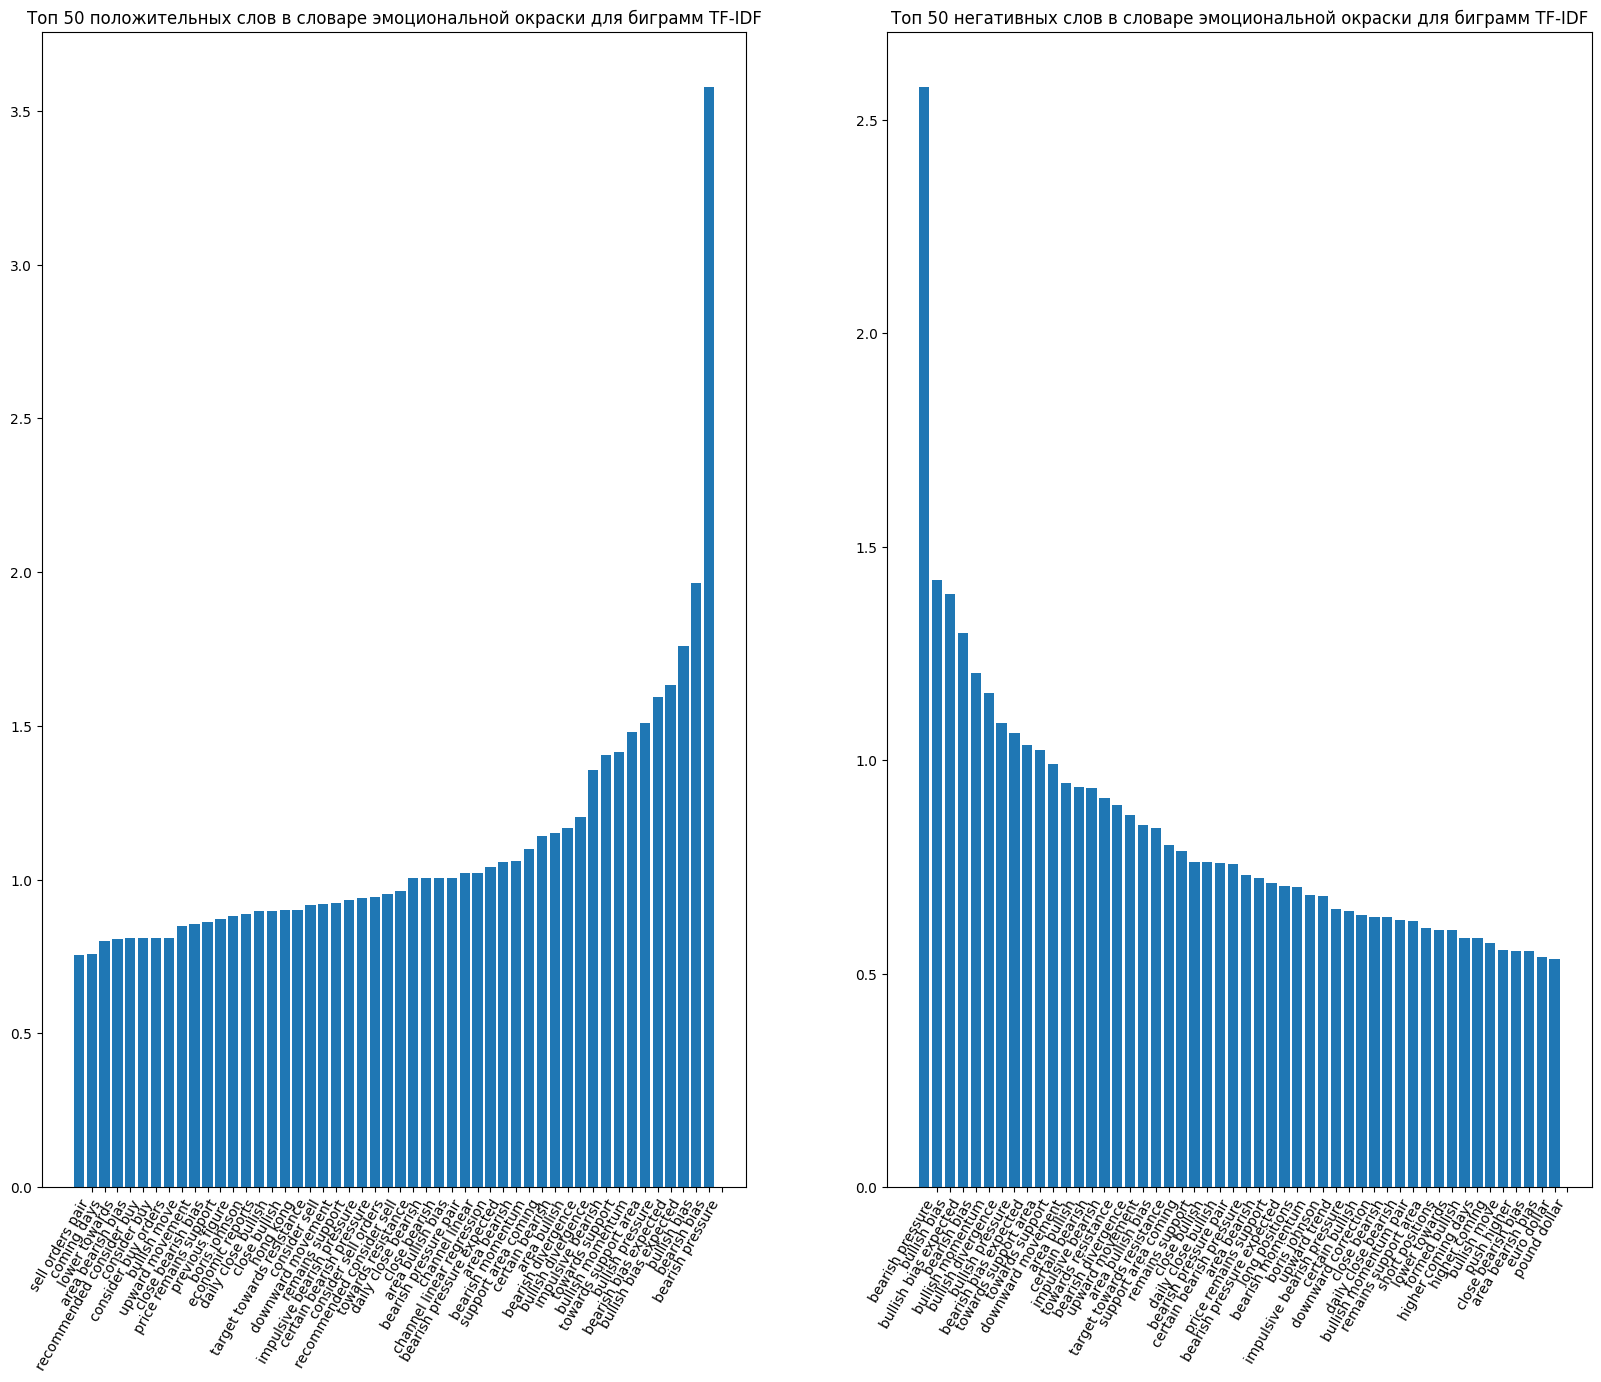

In [117]:
visualize_coefficients(best, tfid_bigram.get_feature_names_out(), 'биграмм TF-IDF')

<Figure size 1500x500 with 0 Axes>

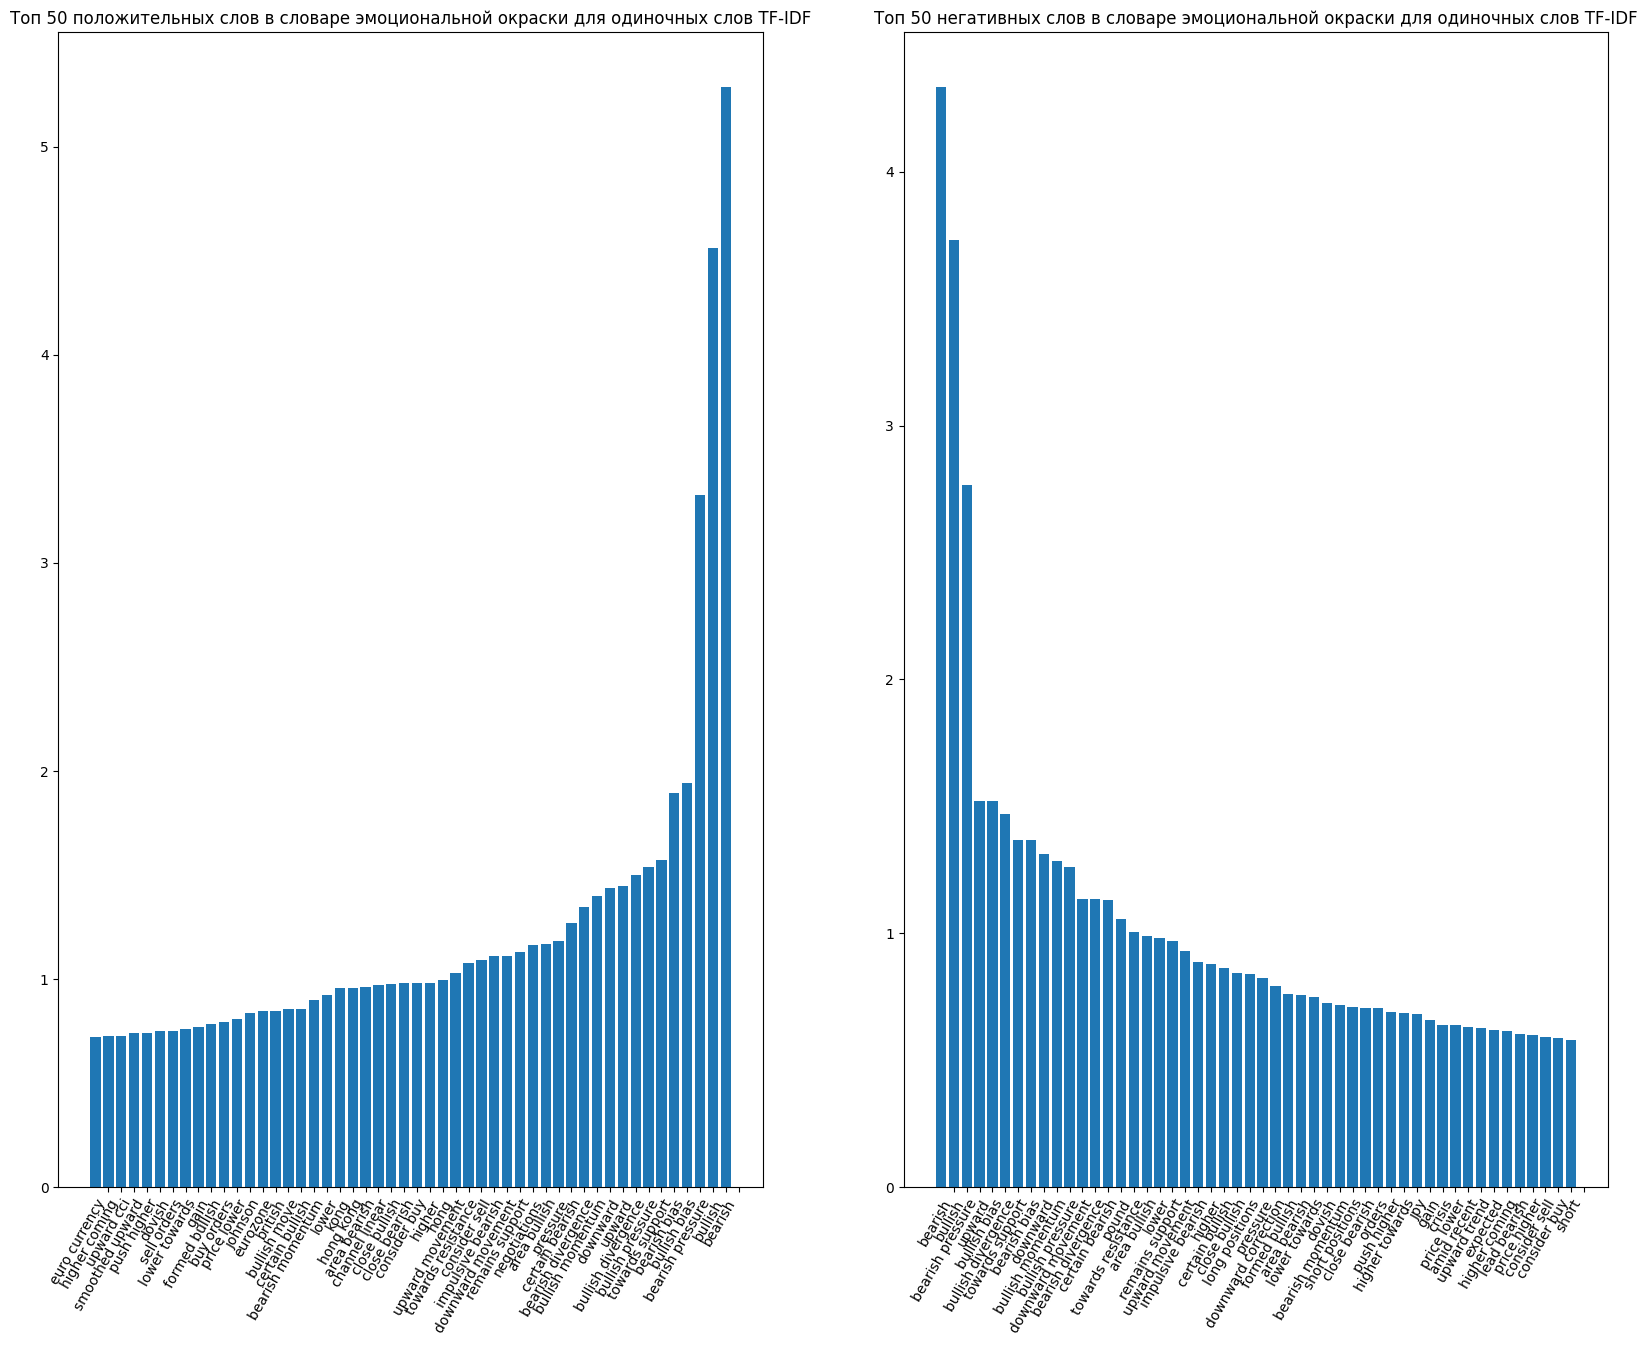

In [118]:
visualize_coefficients(best1, tfid_word.get_feature_names_out(), 'одиночных слов TF-IDF')

<Figure size 1500x500 with 0 Axes>

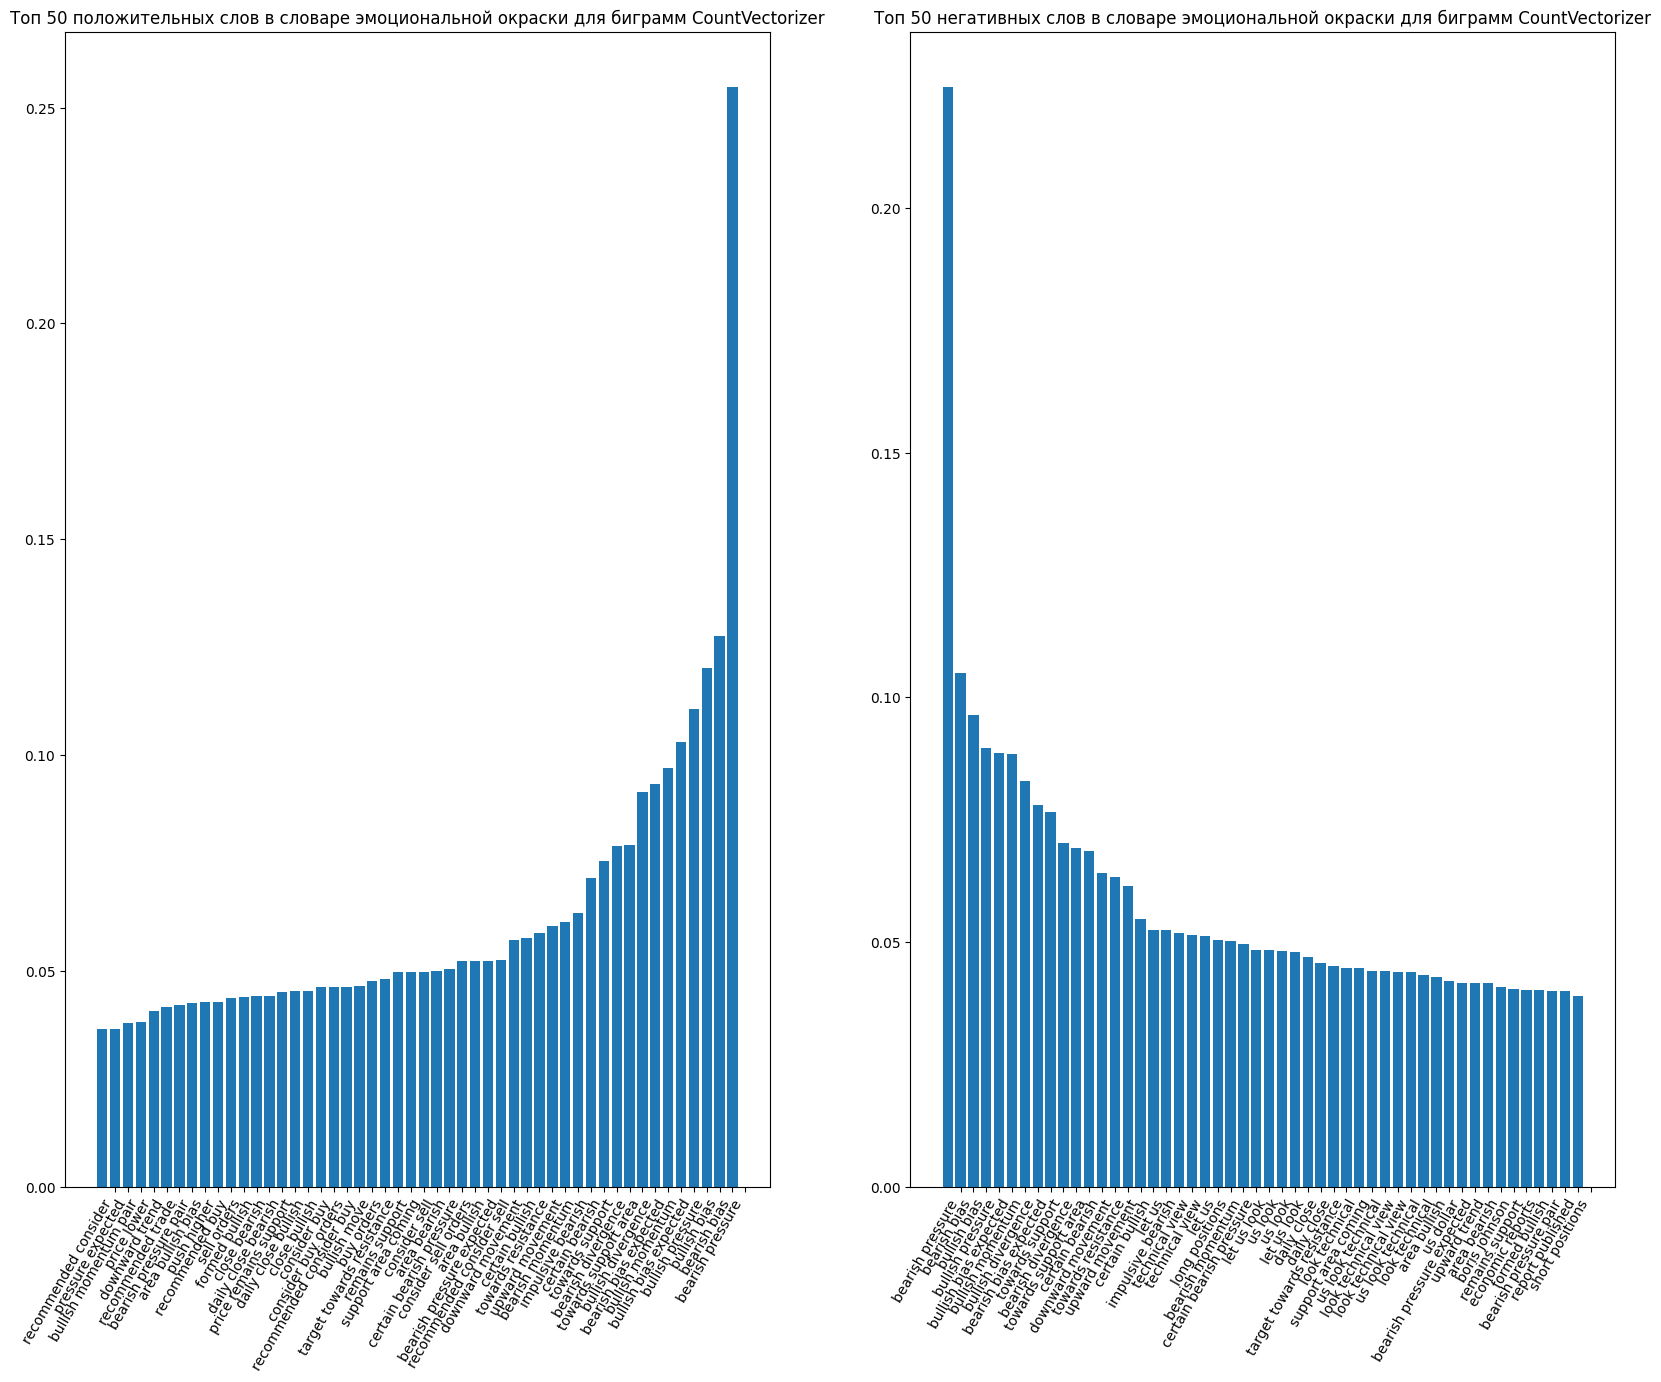

In [119]:
visualize_coefficients(best2, cv_bigram.get_feature_names_out(), 'биграмм CountVectorizer')

<Figure size 1500x500 with 0 Axes>

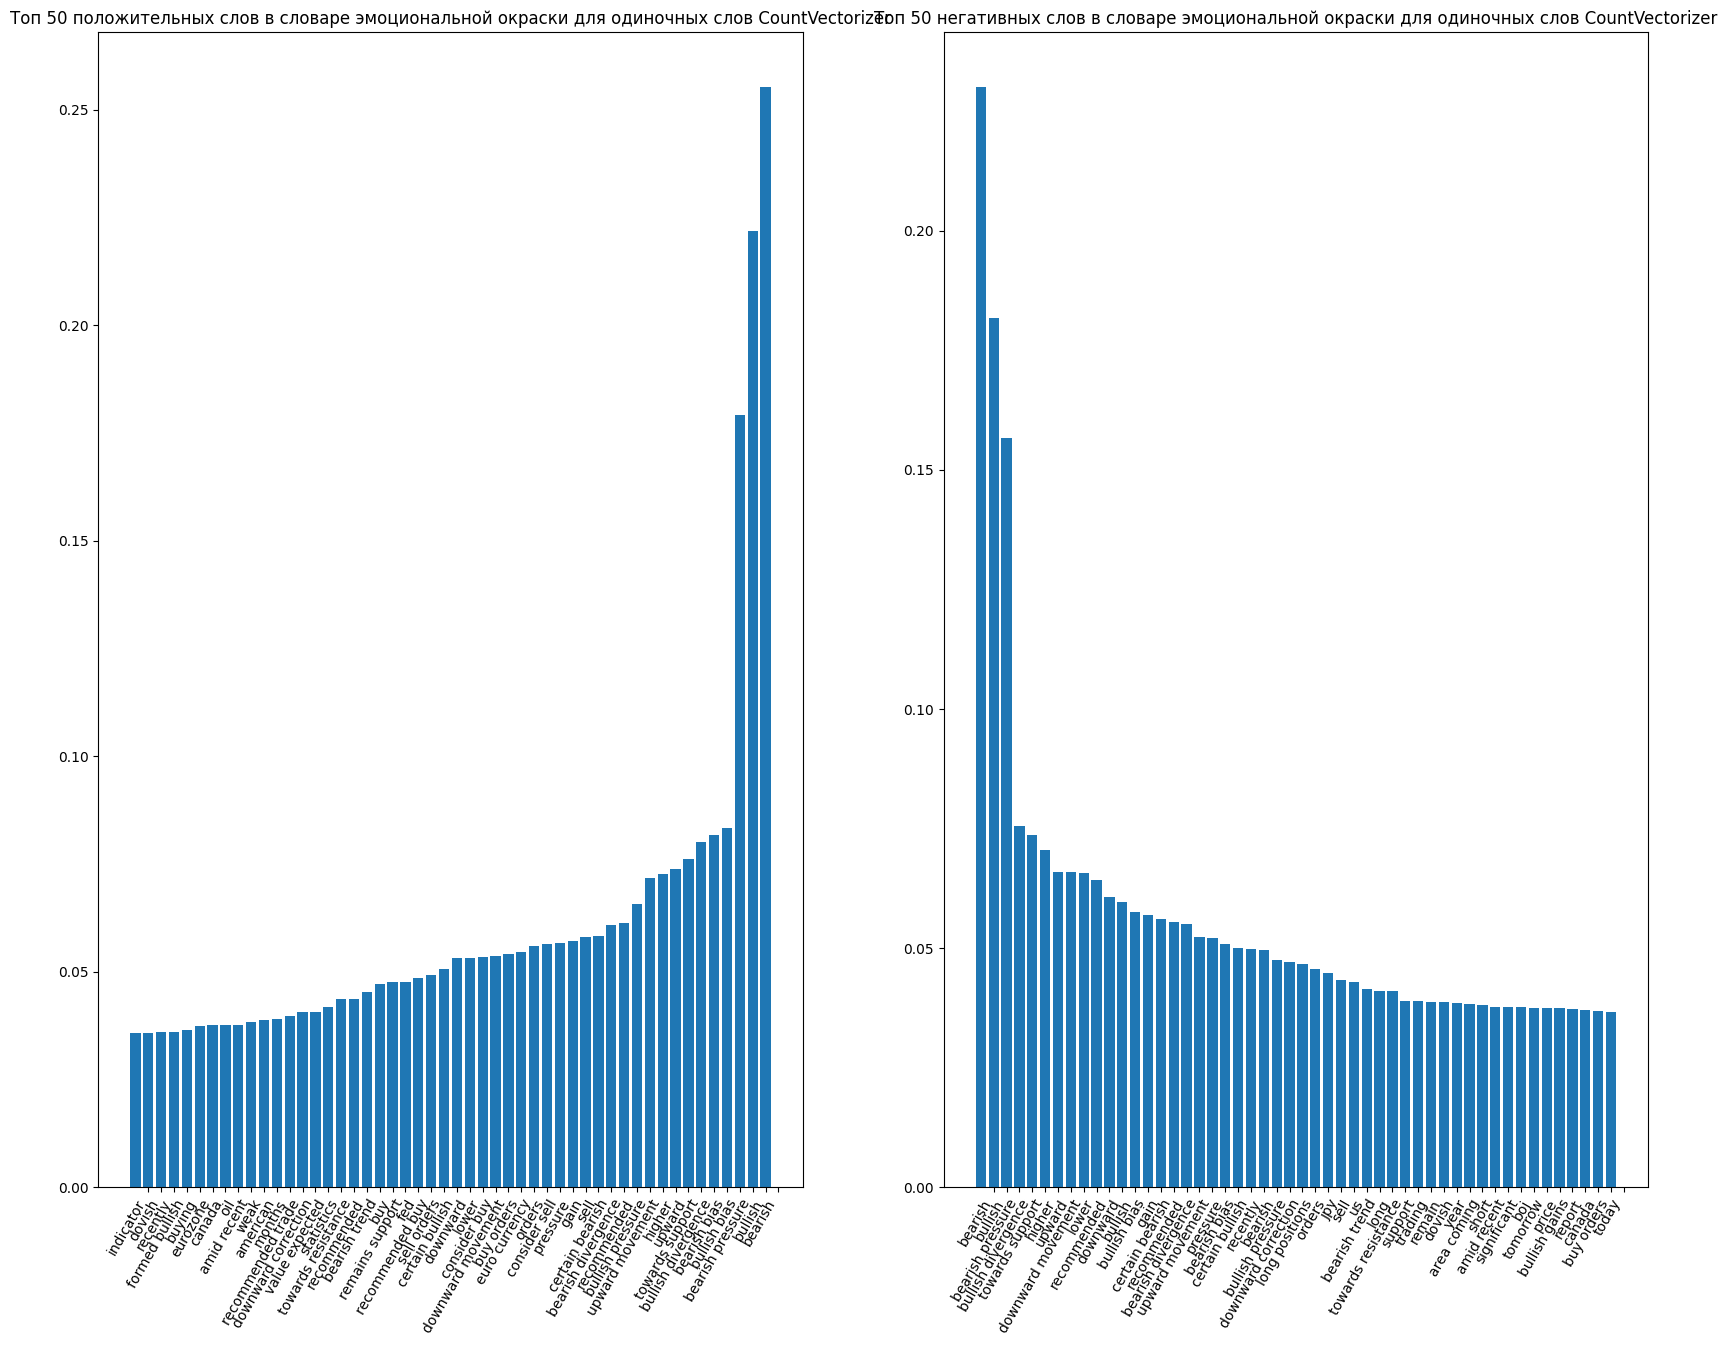

In [120]:
visualize_coefficients(best3, cv_word.get_feature_names_out(), 'одиночных слов CountVectorizer')

# Lexicon Based методы

In [59]:
def make_new_labels(t):
    if t < 0:
        return -1
    elif t > 0:
        return 1 
    else:
        return 0
mapped_labeles_data = labeled_data.copy()
mapped_labeles_data['labels'] = labeled_data['labels'].apply(make_new_labels)

## TextBlob

In [61]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
     - ----------------------------------- 20.5/636.8 kB 222.6 kB/s eta 0:00:03
     -- ---------------------------------- 51.2/636.8 kB 375.8 kB/s eta 0:00:02
     ----- ------------------------------ 102.4/636.8 kB 590.8 kB/s eta 0:00:01
     ------------ ------------------------- 215.0/636.8 kB 1.0 MB/s eta 0:00:01
     -------------- ----------------------- 245.8/636.8 kB 1.0 MB/s eta 0:00:01
     ---------------------- --------------- 378.9/636.8 kB 1.3 MB/s eta 0:00:01
     ---------------------------------- --- 583.7/636.8 kB 1.7 MB/s eta 0:00:01
     -------------------------------------  634.9/636.8 kB 1.8 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 1.5 MB/s eta 0:00:00


In [62]:
from textblob import TextBlob

def f(func, t):
    l = func(t).sentiment[0]
    if l < 0:
        return -1
    elif l > 0:
        return 1
    else:
        return 0

text_blob_predictions = mapped_labeles_data[text].apply(lambda t: f(TextBlob, t))

C:\ProgramData\anaconda3\Lib\threading.py:979: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  del self._target, self._args, self._kwargs
C:\ProgramData\anaconda3\Lib\threading.py:979: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  del self._target, self._args, self._kwargs
C:\ProgramData\anaconda3\Lib\threading.py:979: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  del self._target, self._args, self._kwargs


In [64]:
from sklearn.metrics import f1_score

In [65]:
d = mapped_labeles_data['labels']
print(f'f1_score {f1_score(text_blob_predictions, d, average="macro")}'), print(f'accuracy {accuracy_score(text_blob_predictions, d)}');

f1_score 0.26217959182449235
accuracy 0.3607544777302267


## SentiWordNet

In [66]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def get_sentiment_score_of_review(sentence):
    # 1. Tokenize
    tokens = nltk.word_tokenize(sentence)

    lemmatizer = WordNetLemmatizer()

    sentiment_score = 0.0
    for word in tokens:
        tag = get_wordnet_pos(word)
        item_res = lemmatizer.lemmatize(word, tag)
        if not item_res:
            continue
        
        synsets = wordnet.synsets(item_res, pos=tag)
        if len(synsets) == 0:
            continue
        
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment_score += swn_synset.pos_score() - swn_synset.neg_score()
        
    return sentiment_score

swn_prediction = labeled_data[text].apply(lambda t: make_new_labels(get_sentiment_score_of_review(t)))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Андрей\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Андрей\AppData\Roaming\nltk_data...
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\Андрей\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\sentiwordnet.zip.


In [67]:
print(f'f1_score {f1_score(swn_prediction, d, average="macro")}'), print(f'accuracy {accuracy_score(swn_prediction, d)}');

f1_score 0.2951312362708776
accuracy 0.36978919004596605


## VADER

In [68]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
import numpy as np
sia = SentimentIntensityAnalyzer()
def find_sentiment_vader(t, sia):
    g = sia.polarity_scores(t)
    map_sentiment = {
        'neg': -1,
        "neu": 0,
        "pos": 1
    }
    arr = []
    for key in map_sentiment:
        arr.append(g[key])
    return map_sentiment[list(map_sentiment.keys())[np.argmax(arr)]]
vader_prediction = labeled_data[text].apply(lambda t: find_sentiment_vader(t, sia))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Андрей\AppData\Roaming\nltk_data...


In [69]:
print(f'f1_score {f1_score(vader_prediction, d, average="macro")}'), print(f'accuracy {accuracy_score(vader_prediction, d)}');

f1_score 0.14198264776194397
accuracy 0.26945633222380727
